In [27]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from IPython.display import Image, display_png
import seaborn as sns
from pyproj import Proj, transform

This project got me interested in understanding the various scottish producing regions and the characteristic of whisky by regions. 

The inspiration of this dataset is try to predict which distillery make the most pungent whisky. From various literature on Whisky regions of Scotland, Islay region produces the malts that are pungent with peaty, smoke and are saline. They evoke anything from linseed to mossy, pepper to purity,carbolic to floral paltes.

Key Characteristic of PEATY whisky are:
PEATY:
Phenols:   Tar Like
Smokey:   Wood Smoke
Sea Tangle:   Sea Shore/Sea weed
Iodine:   Sea Breeze
Medicinal:   TCP
Kippery:   Smoked Fish
Birchy:   Mossy


In [28]:
df=pd.read_csv(r'../Scotish Whisky/whisky.csv')
df.head()

,RowID,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude
0,1,Aberfeldy,2,2,2,0,0,2,1,2,2,2,2,2,\tPH15 2EB,28.658,-7.4968
1,2,Aberlour,3,3,1,0,0,4,3,2,2,3,3,2,\tAB38 9PJ,32.634,-8.4257
2,3,AnCnoc,1,3,2,0,0,2,0,0,2,2,3,2,\tAB5 5LI,35.296,-8.3932
3,4,Ardbeg,4,1,4,4,0,0,2,0,1,2,1,0,\tPA42 7EB,14.156,-6.4622
4,5,Ardmore,2,2,2,0,0,1,1,1,2,3,1,1,\tAB54 4NH,35.535,-8.2914


In [29]:
df.shape

(86, 17)

In [30]:
df.describe()

,RowID,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Latitude,Longitude
count,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000
mean,43.500000,2.069767,2.290698,1.534884,0.546512,0.116279,1.244186,1.383721,0.976744,1.465116,1.802326,1.802326,1.697674,28.724716,-8.026597
std,24.969982,0.930410,0.717287,0.863613,0.990032,0.322439,0.853175,0.784686,0.932760,0.821730,0.629094,0.779438,0.855017,6.788905,0.880242
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.668000,-10.092600
25%,22.250000,2.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,26.567250,-8.507700
50%,43.500000,2.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,31.951500,-8.398850
75%,64.750000,2.000000,3.000000,2.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,32.863000,-7.556975
max,86.000000,4.000000,4.000000,4.000000,4.000000,1.000000,4.000000,3.000000,4.000000,4.000000,3.000000,3.000000,4.000000,38.102000,-5.542600


In [31]:
df.dtypes

RowID           int64
Distillery     object
Body            int64
Sweetness       int64
Smoky           int64
Medicinal       int64
Tobacco         int64
Honey           int64
Spicy           int64
Winey           int64
Nutty           int64
Malty           int64
Fruity          int64
Floral          int64
Postcode       object
Latitude      float64
Longitude     float64
dtype: object

#### Correlation among variables/attributes

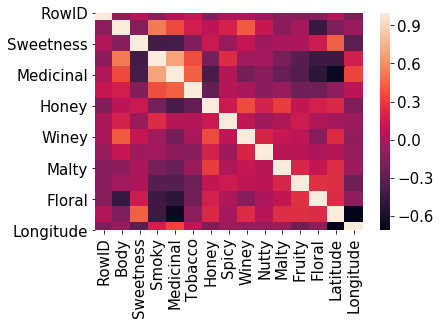

In [32]:
corm=df.corr()
sns.heatmap(corm)

#### How to choose number of clusters: Using the elbow method


In [33]:
from sklearn.cluster import KMeans

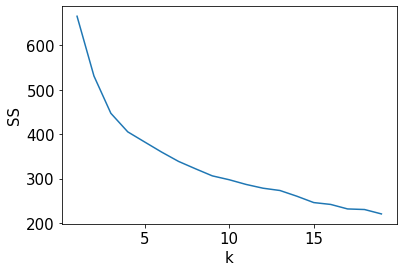

In [34]:
SS = []
NC = range(1,20)
for k in NC:
    km = KMeans(n_clusters=k)
    km = km.fit(df.iloc[:,2:14])
    SS.append(km.inertia_)
plt.plot(NC,SS)
plt.xlabel('k')
plt.ylabel('SS')
plt.show()

##### We can see @ k=5  the SS dramatically decreases so we use k=5 for our algorithm

Fit the KMeans alogorithm to the data

In [35]:
X = df.iloc[:,2:14]
y = df['Distillery']

#### Fit the model to the Training data

In [36]:
kmc5 = KMeans(n_clusters=5, random_state=0) # choose any arguments for the KMeans algorithm
cluster=kmc5.fit(X)
cluster

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

#### Predict cluster labels assigned to each data point

In [37]:
# One we fit the algoritum on X, with .labels_ method the algorithm assigns each data point (or row) to a particular cluster
# the same result is obtained with .predict(X) method
results=kmc5.labels_ 
results

array([2, 2, 0, 1, 4, 0, 0, 2, 0, 4, 3, 2, 2, 0, 2, 2, 0, 2, 4, 4, 0, 1,
       0, 1, 2, 0, 3, 4, 0, 2, 0, 2, 4, 0, 4, 0, 4, 0, 2, 4, 0, 0, 3, 2,
       2, 0, 0, 0, 2, 0, 0, 4, 2, 4, 0, 4, 2, 1, 1, 0, 0, 2, 3, 0, 0, 3,
       4, 4, 4, 0, 2, 2, 0, 0, 4, 2, 0, 1, 0, 0, 0, 0, 4, 0, 4, 0])

#### Let's see the cluster centers

In [38]:
# to see the cluster centers 

ccenter5 = kmc5.cluster_centers_
ccenter5

array([[ 1.41666667e+00,  2.47222222e+00,  1.05555556e+00,
         2.50000000e-01,  5.55555556e-02,  9.72222222e-01,
         1.08333333e+00,  4.44444444e-01,  1.13888889e+00,
         1.69444444e+00,  1.97222222e+00,  2.13888889e+00],
       [ 3.66666667e+00,  1.50000000e+00,  3.66666667e+00,
         3.33333333e+00,  6.66666667e-01,  1.66666667e-01,
         1.66666667e+00,  5.00000000e-01,  1.16666667e+00,
         1.33333333e+00,  1.16666667e+00,  1.66666667e-01],
       [ 2.42857143e+00,  2.38095238e+00,  1.33333333e+00,
         4.76190476e-02,  4.76190476e-02,  2.00000000e+00,
         1.66666667e+00,  1.47619048e+00,  1.90476190e+00,
         2.23809524e+00,  2.09523810e+00,  2.04761905e+00],
       [ 3.80000000e+00,  2.40000000e+00,  1.80000000e+00,
         0.00000000e+00, -1.38777878e-17,  1.80000000e+00,
         1.60000000e+00,  3.20000000e+00,  2.20000000e+00,
         1.40000000e+00,  2.00000000e+00,  1.20000000e+00],
       [ 1.94444444e+00,  2.05555556e+00,  1.9444444

#### Lets Visualize the Clusters

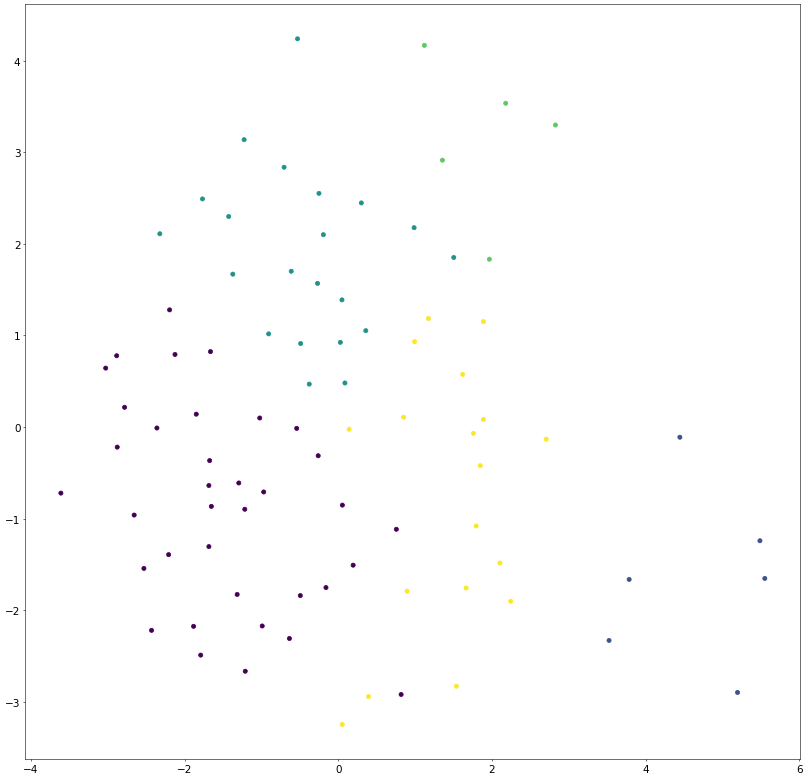

In [39]:
from sklearn.manifold import MDS

plt.figure(figsize=(20, 20), dpi=50)
plt.rcParams["font.size"] = 15
labels=y

model = MDS(n_components=2, dissimilarity="euclidean", random_state=0)
out = model.fit_transform(X)
plt.scatter(out[:, 0], out[:, 1], c=kmc5.labels_)

                

plt.show()
    

#### Add the results or clusters to each row in the dataframe and view the distillery in each cluster

In [40]:
# Add cluster ctreated ny kMeans to the dataframe
df['Cluster']=results


In [41]:
t= df.groupby('Cluster')['Distillery'].unique()
t

Cluster
0    [AnCnoc, ArranIsleOf, Auchentoshan, Aultmore, ...
1    [Ardbeg, Caol Ila, Clynelish, Lagavulin, Laphr...
2    [Aberfeldy, Aberlour, Auchroisk, Belvenie, Ben...
3    [Balmenach, Dailuaine, Glendronach, Macallan, ...
4    [Ardmore, Balblair, Bowmore, Bruichladdich, Da...
Name: Distillery, dtype: object

In [42]:
# Create a column cluster_name, print the clusters and count  the distillery in each cluster

df['cluster_name']= df.groupby('Cluster')['Distillery'].transform('unique')
df['cluster_name'].value_counts()

[AnCnoc, ArranIsleOf, Auchentoshan, Aultmore, Benriach, Bladnoch, Bunnahabhain, Cardhu, Craigganmore, Dalwhinnie, Dufftown, GlenElgin, GlenGrant, GlenMoray, GlenSpey, Glenallachie, Glenfiddich, Glengoyne, Glenkinchie, Glenlossie, Glenmorangie, Inchgower, Linkwood, Loch Lomond, Mannochmore, Miltonduff, RoyalBrackla, Speyburn, Speyside, Strathmill, Tamdhu, Tamnavulin, Teaninich, Tobermory, Tomintoul, Tullibardine]    36
[Aberfeldy, Aberlour, Auchroisk, Belvenie, BenNevis, Benrinnes, Benromach, BlairAthol, Craigallechie, Deanston, Edradour, GlenOrd, Glendullan, Glenfarclas, Glenlivet, Glenturret, Knochando, Longmorn, RoyalLochnagar, Scapa, Strathisla]                                                                                                                                                                                         21
[Ardmore, Balblair, Bowmore, Bruichladdich, Dalmore, GlenDeveronMacduff, GlenGarioch, GlenKeith, GlenScotia, Glenrothes, Highland Park, Isle of Jura, Oban, 

In [43]:
df.query('Distillery=="Balmenach"or Distillery== "Dailuaine"')

,RowID,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude,Cluster,cluster_name
10,11,Balmenach,4,3,2,0,0,2,1,3,3,0,1,2,\tPH26 3PF,30.775,-8.2717,3,"[Balmenach, Dailuaine, Glendronach, Macallan, ..."
26,27,Dailuaine,4,2,2,0,0,1,2,2,2,2,2,1,\tAB38 7RE,32.352,-8.4101,3,"[Balmenach, Dailuaine, Glendronach, Macallan, ..."


#### Lets Try and plot the Distilleries on the map of Scotland whisky regions and try see if theer is a relation between  the location and the clusters

##### Define the bounding box

In [44]:
BBox = (df.Longitude.min(),df.Longitude.max(),df.Latitude.min(),df.Latitude.max())
BBox

(-10.0926, -5.5426, 12.668, 38.102)

##### Get your Map

    Go to www.opestreetmap.org website and get the desired map ny entering the bounding box data